<h1>MLDM Lab week 2: Introduction to the Breast Cancer dataset, using heatmaps, visualising and pruning a Decision Tree </h1>

<h3> <font color="blue"> Introduction </h3>
<p>In this lab session we explore the Breast Cancer Wisconsin dataset using heatmaps. We will also learn and visualise a decision tree classifier.</p>
<p>The dataset is <b>Breast Cancer Wisconsin  dataset</b>, which is a well-known machine learning dataset. </p>
<p>More details about the dataset can be found from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a> and from <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2#">kaggle</a></p>

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Introduction to the Breast Cancer dataset </p>
<p> 2.  Learn how to use heatmaps to explore correlations</p>
<p> 3.  Learn how to visualise a decision tree</p>
<p> 4.  Use sklearn to learn and prune a decision tree classifier</p>

<h2> <font color="blue"> Breast Cancer Wisconsin dataset</font> </h2>
<p> The dataset contains 569 datapoints on 30 features computed from digitized images of cells. Together these features determine whether sampled cells are <i>malignant</i> cells or <i>benign</i>. Attributes include: 1) ID number
2) Diagnosis: M = malignant (cancerous), B = benign(non-cancerous). Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

</p> 

<h3> <font color="blue"> Load  dataset </font> </h3>
<p> Several popular dataset including the Iris dataset and the Breast Cancer dataset are readily avaiable in sklearn and can be loaded directly after imported from sklearn.datasets.</p>

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

<p> The dataset has 30 columns and 569 rows which can be explored using the following code:</p>

In [17]:
# Print the information contained within the dataset
print(data.keys(),"\n")
#Print the feature names
count=0
for f in data.feature_names:
 count+=1
 print(count,"-",f)
#Print the classes
print(data.target_names,"\n")
#Printing the Initial Few Rows
print(data.data[0:3], "\n")
#Print the class values of first 30 datapoints
print(data.target[0:30], "\n")
#Print the dimensions of data
print(data.data.shape, "\n")

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

1 - mean radius
2 - mean texture
3 - mean perimeter
4 - mean area
5 - mean smoothness
6 - mean compactness
7 - mean concavity
8 - mean concave points
9 - mean symmetry
10 - mean fractal dimension
11 - radius error
12 - texture error
13 - perimeter error
14 - area error
15 - smoothness error
16 - compactness error
17 - concavity error
18 - concave points error
19 - symmetry error
20 - fractal dimension error
21 - worst radius
22 - worst texture
23 - worst perimeter
24 - worst area
25 - worst smoothness
26 - worst compactness
27 - worst concavity
28 - worst concave points
29 - worst symmetry
30 - worst fractal dimension
['malignant' 'benign'] 

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2

<h3> <font color="blue"> Plotting a heatmap </font> </h3>
<p> A heatmap can be used to visualise the correlation between the features. The code below is used to plot a heatmap for  7 out of 30 features.</p>
<p> NOTE: You need to install 'seaborn' using 'pip3', and use Python 3 kernel for this lab session.</p>

['mean texture' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points']


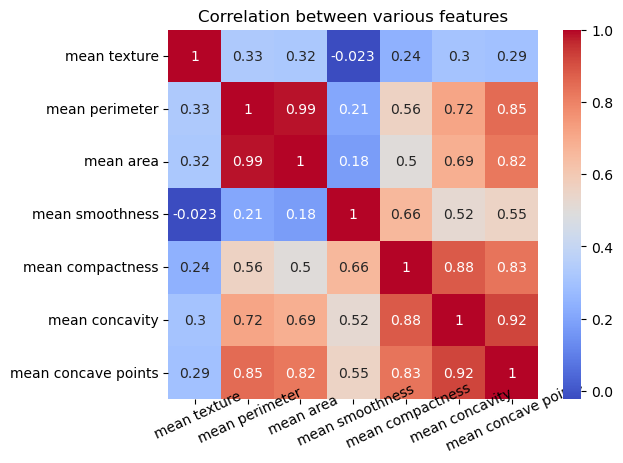

In [14]:
#Import the necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Arrange the data as a dataframe
data1 = pd.DataFrame(data.data)
data1.columns = data.feature_names
# Plotting only 7 features out of 30
NUM_POINTS = 7
features_mean= list(data1.columns[1:NUM_POINTS+1])
feature_names = data.feature_names[1:NUM_POINTS+1]
print(feature_names)
f,ax = plt.subplots(1,1) #plt.figure(figsize=(10,10))
sns.heatmap(data1[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
# Set number of ticks for x-axis
ax.set_xticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for x-axis
ax.set_xticklabels(feature_names, rotation=25, rotation_mode="anchor",fontsize=10)
# Set number of ticks for y-axis
ax.set_yticks([float(n)+0.5 for n in range(NUM_POINTS)])
# Set ticks labels for y-axis
ax.set_yticklabels(feature_names, rotation='horizontal', fontsize=10)
plt.title("Correlation between various features")
plt.show()
plt.close()

<h3><font color="red">Excercises 1 </h3>
    <p> If two features are highly correlated then they may convey the same information. Hence one of them can be removed from the analysis. Use the heatmap above and identify features which could be redundant.</p>

<h3>Answer to Excercis 1 </h3>
    <p>Use this space to provide your answer to Excercise 1
</p>
    

In [19]:
corr_data=data1.iloc[:,:].corr()

In [20]:
import warnings
warnings.filterwarnings("ignore")
iters=range(len(corr_data.columns))
drop_cols=[]

In [22]:
for i in iters:
    for j in range(i+1):
        items=corr_data.iloc[j:(j+1), (i+1):(i+2)]
        col=items.columns
        row=items.index
        val=abs(items.values)
        if val > 0.9:
            print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
            drop_cols.append(col.values[0])
drops=set(drop_cols)
dataCorr=data1.drop(columns=drops)

mean perimeter | mean radius | 1.0
mean area | mean radius | 0.99
mean area | mean perimeter | 0.99
mean concave points | mean concavity | 0.92
perimeter error | radius error | 0.97
area error | radius error | 0.95
area error | perimeter error | 0.94
worst radius | mean radius | 0.97
worst radius | mean perimeter | 0.97
worst radius | mean area | 0.96
worst texture | mean texture | 0.91
worst perimeter | mean radius | 0.97
worst perimeter | mean perimeter | 0.97
worst perimeter | mean area | 0.96
worst perimeter | worst radius | 0.99
worst area | mean radius | 0.94
worst area | mean perimeter | 0.94
worst area | mean area | 0.96
worst area | worst radius | 0.98
worst area | worst perimeter | 0.98
worst concave points | mean concave points | 0.91


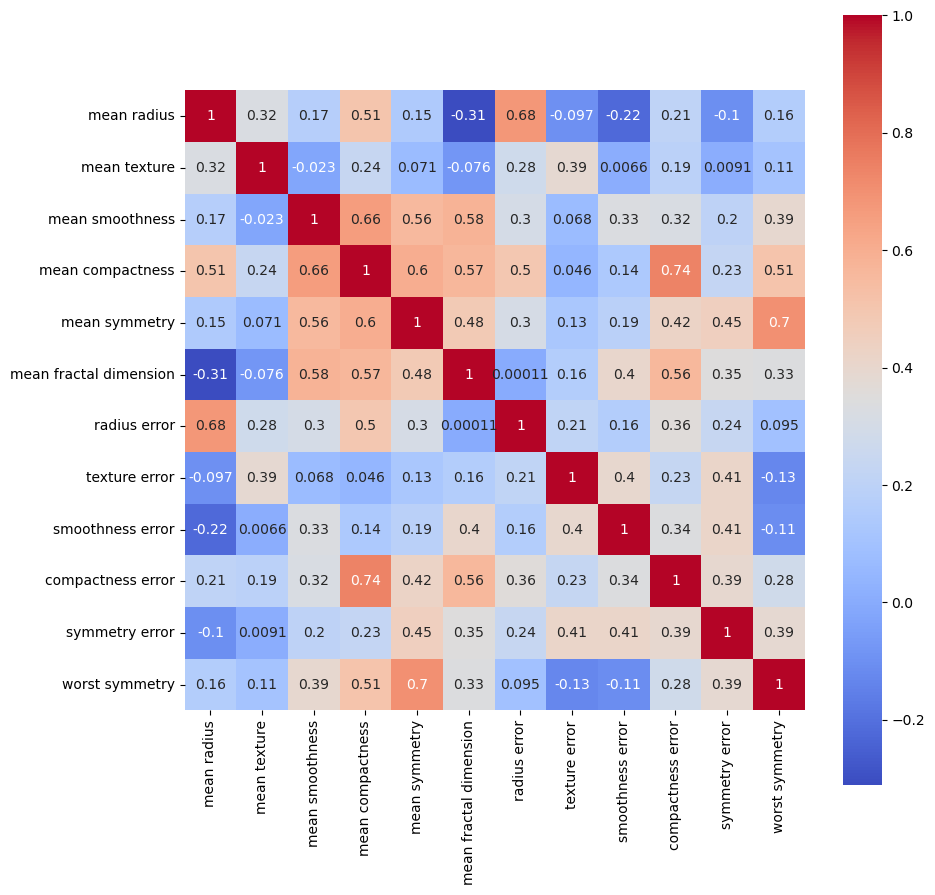

In [24]:
#After removing correlation
plt.figure(figsize=(10,10))
sns.heatmap(dataCorr.iloc[:,:].corr(),annot=True,square=True,cmap="coolwarm",)
plt.show()

In [43]:
#All the removed columns
drops

{'area error',
 'concave points error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

In [26]:
dataCorr.shape

(569, 12)

<h3> <font color="blue"> Plotting a scatter matrix </font> </h3>
<p> Another multivariate plots which could be used to spot structured relationships between pairs of attributes is scatter matrix. The code below is used to plot a scatter matrix for the same data frame defined for the heatmap above.</p>

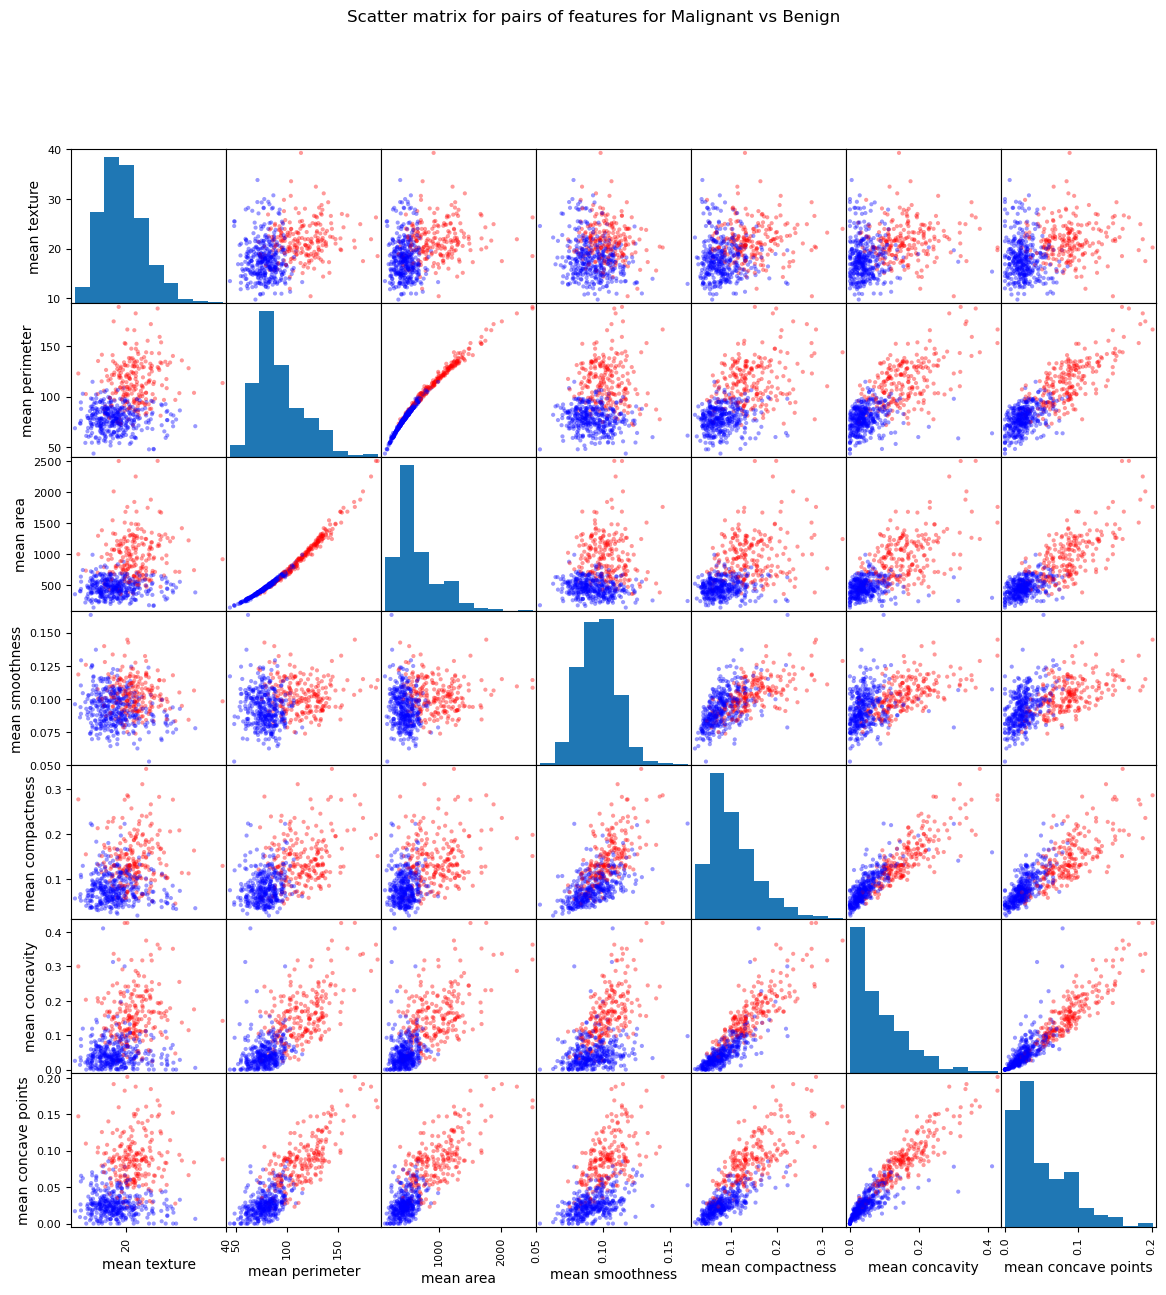

In [30]:
#Color Labels - 0 is benign and 1 is malignant
color_dic = {0:'red', 1:'blue'} 
target_list = list(data['target'])
colors = list(map(lambda x: color_dic.get(x), target_list))
#Plotting the scatter matrix
sm = pd.plotting.scatter_matrix(data1[features_mean], c= colors, alpha=0.4, figsize=((14,14)))
plt.suptitle("Scatter matrix for pairs of features for Malignant vs Benign ")
plt.show()

<h3><font color="red">Excercises 2 </h3>
    <p> Explain how the scatter matrix above can be used to identify highly correlated features. What other information can be inferred from this plot?</p>

<h3>Answer to Excercis 2 </h3>
    <p>Use this space to provide your answer to Excercise 2
</p>
    

#### In the scatter matrix, pairs of features that are highly positively correlated will appear as points closely aligned along a line with a positive slope (rising from left to right) such as mean area and mean parameter along with this mean concave and mean concavity. This indicates a strong linear relationship where increases in one feature are associated with increases in the other.

#### features that are negatively correlated will show a pattern where the points are aligned along a line with a negative slope (falling from left to right). Here, an increase in one feature corresponds to a decrease in the other.

#### Scatter plots where the points form a cloud without a discernible pattern or direction indicate little to no linear correlation between those features.

### Other Information
#### the histogram on the diognal shows the distribution of each feature. For ex mean area has a right-skewed distribution, meaning most tumors have a smaller area with fewer larger ones.
#### malignant tumors have higher values for mean perimeter, mean area, mean compactness, mean concavity, and mean concave points. This suggests that these features could be significant in distinguishing between malignant and benign tumors.

<h2> <font color="blue"> Visualising a decision tree</font> </h2>
<p> A decition tree can be visualised using the plot_tree function. This is demonstrated in the example below. However, the visibility of the figure for large trees might be poor when using this method. The solution is to export the tree in  Graphviz format using the export_graphviz exporter (you may need to install 'graphviz using pip). More information can be found from <a href="https://scikit-learn.org/stable/modules/tree.html#classification">here</a>

</p> 

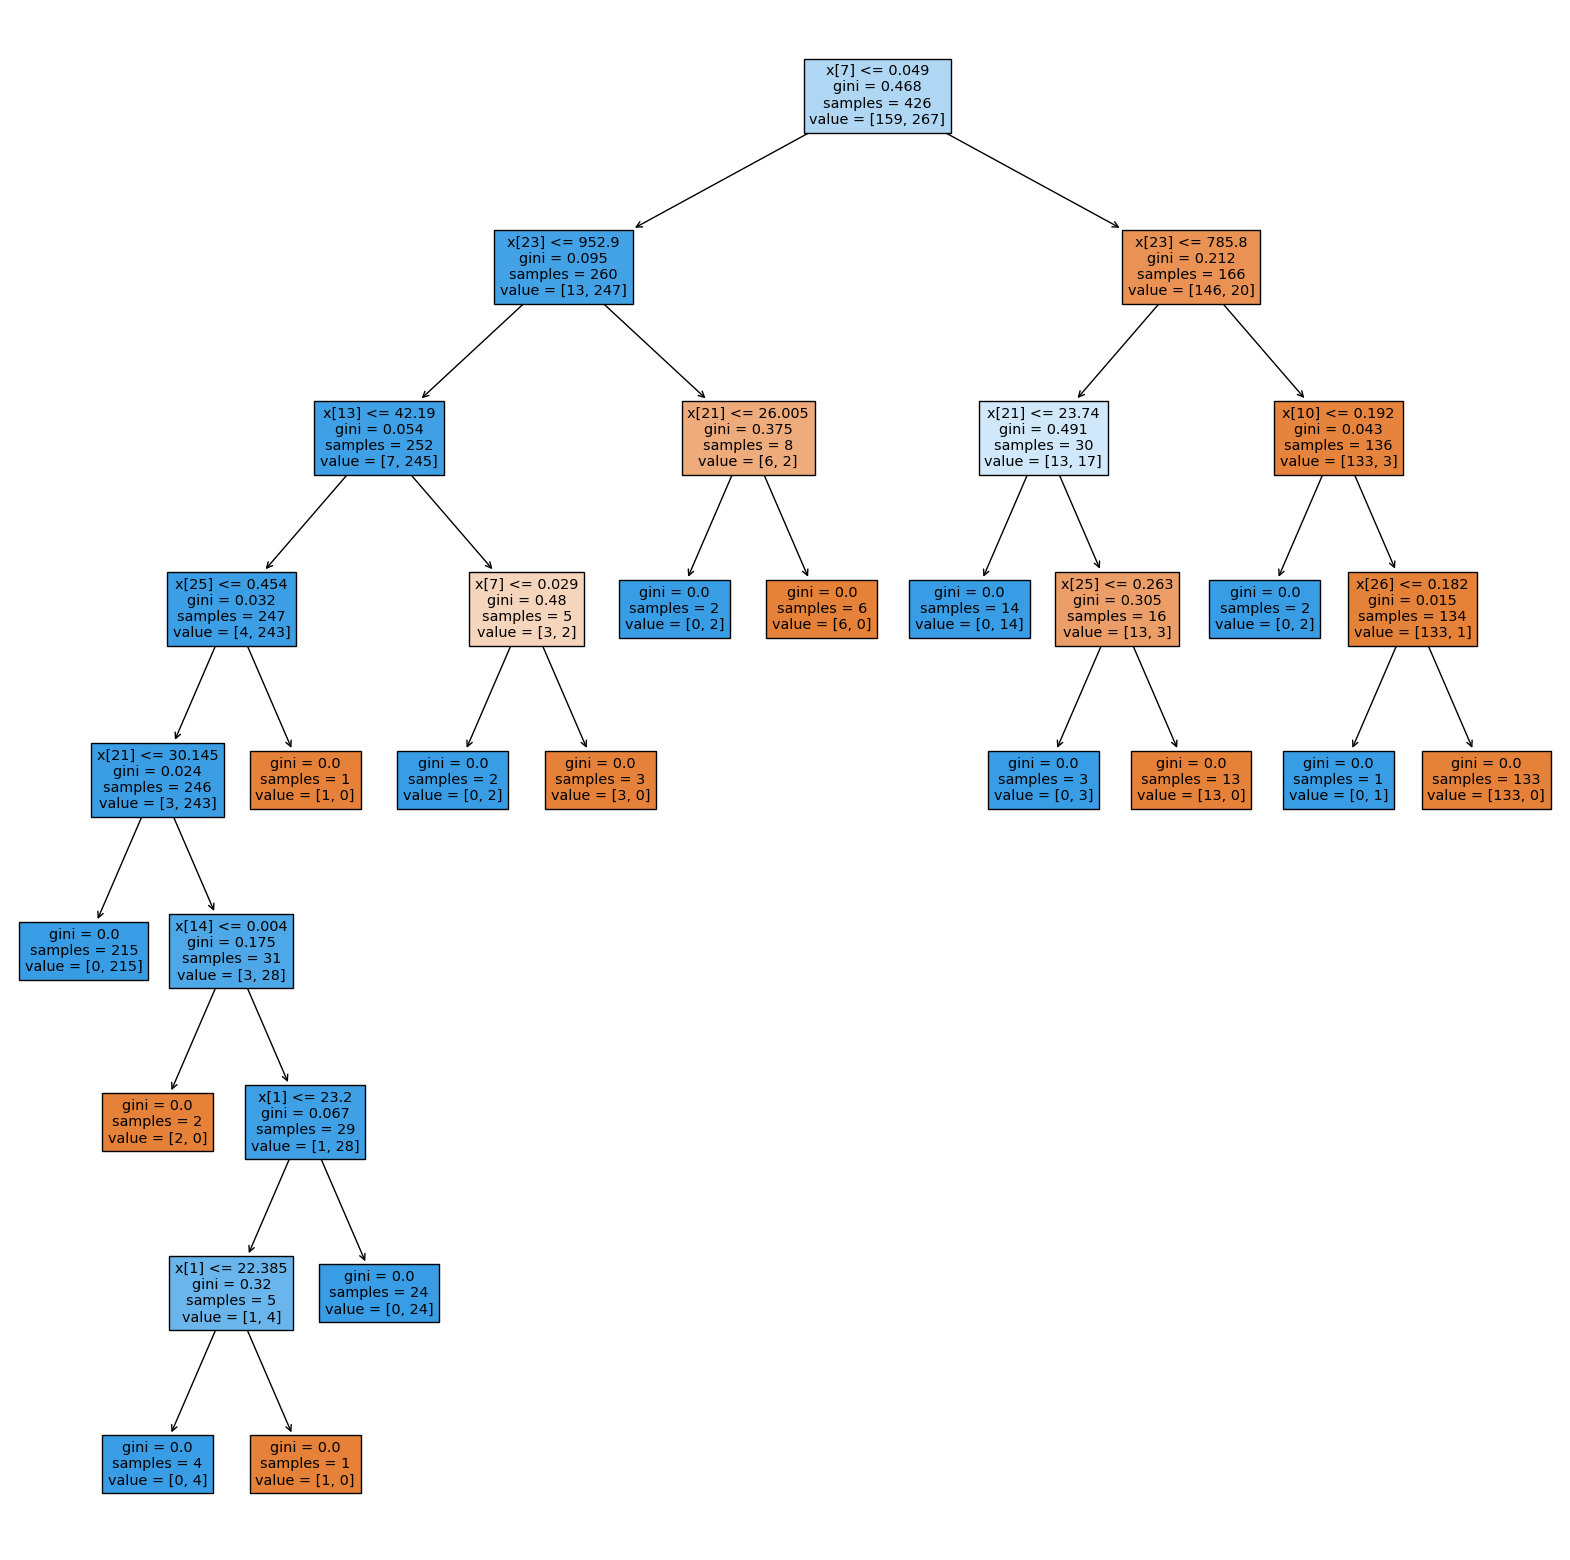

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf1, filled=True)
plt.show()

Note that the tree above is created using the default criterion which is 'gini' rather than 'entropy'. Below we measure the accuracy on the training and test datasets.

In [4]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf1.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.8811188811188811


<h2> <font color="blue"> Pruning decision trees with cost complexity pruning</font> </h2>

In the example above, the predictive accuracies on the training and test datasets suggest that the learned tree might be overfitting the training data.

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. 

Cost complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned.

See <a href="https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning">`minimal_cost_complexity_pruning`</a> for more details on pruning.

The example below shows a decision tree which is created by post pruning using cost complexity pruning with ``ccp_alpha=0.005``.

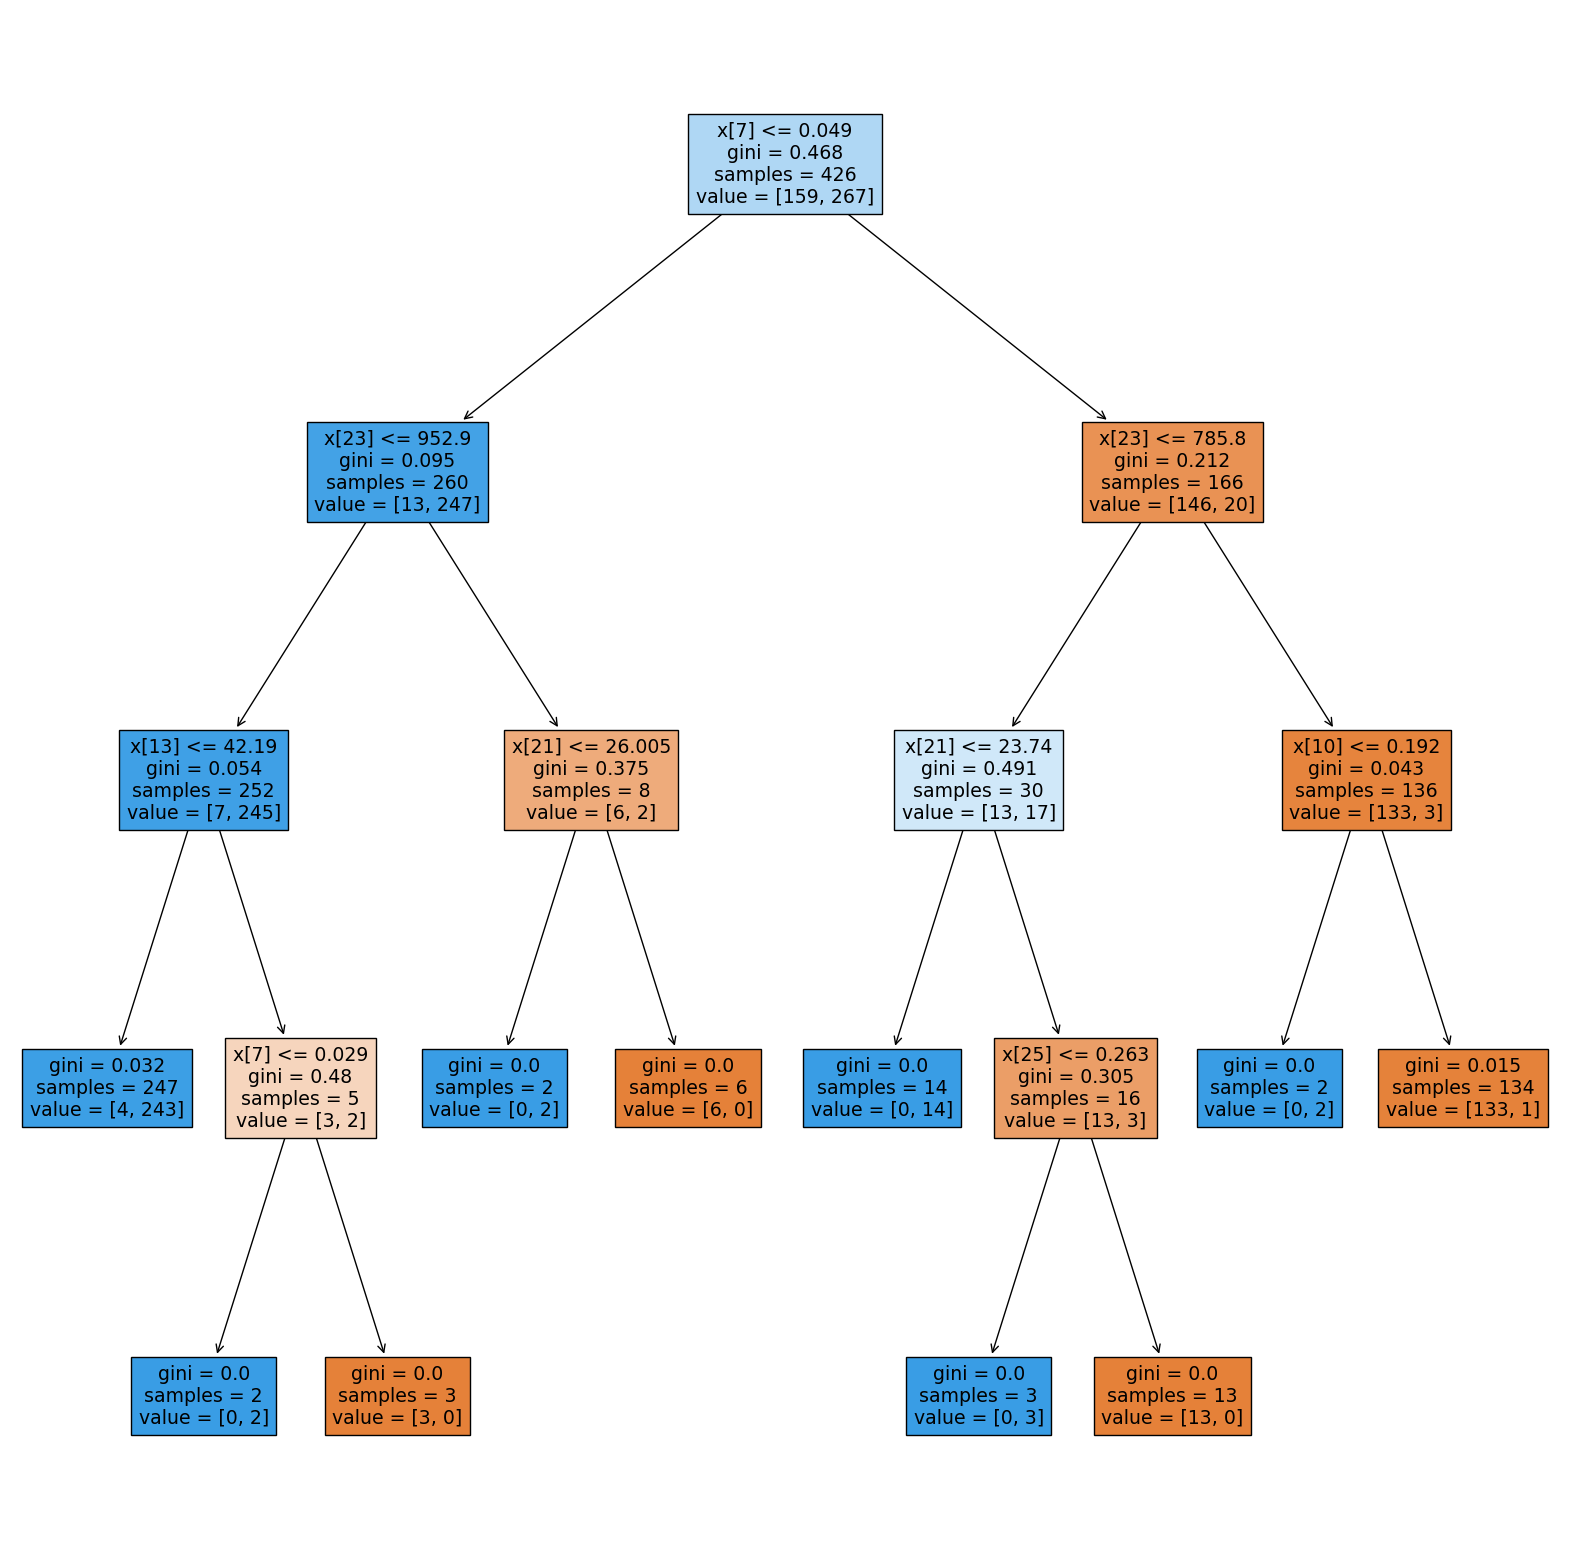

In [5]:
clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf2, filled=True)
plt.show()

In [6]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

Accuracy Score on train data:  0.9882629107981221
Accuracy Score on the test data:  0.916083916083916


As you can see the accuracy of the tree on the test data has been significantly increased (while the accuracy on the training data slightly decreased). We also have a smaller decision tree. In the following we experiment with a higher value for ``ccp_alpha``.

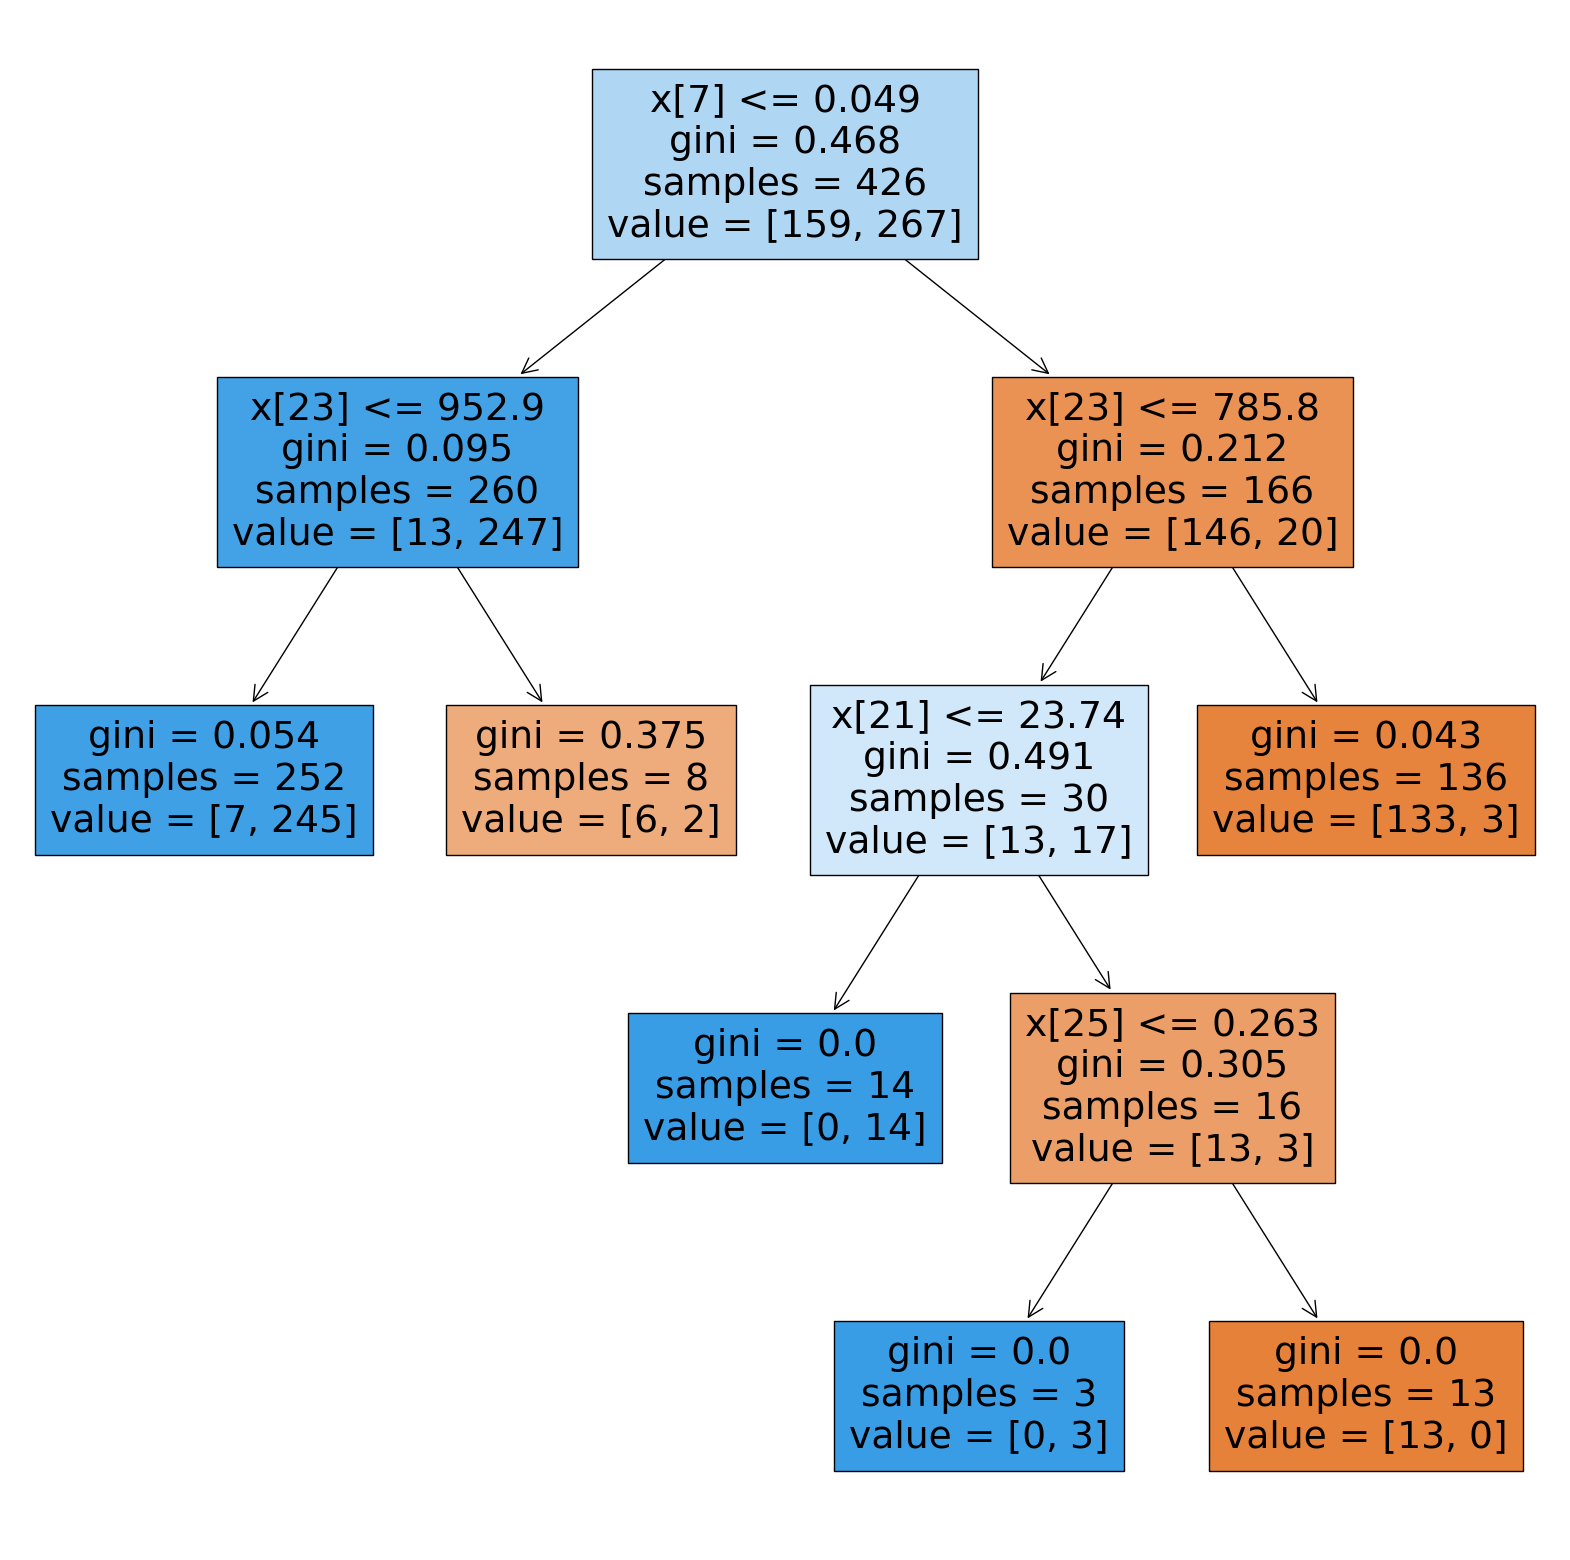

Accuracy Score on train data:  0.971830985915493
Accuracy Score on the test data:  0.9300699300699301


In [7]:
clf3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf3, filled=True)
plt.show()
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf3.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf3.predict(X_test)))

<h3><font color="red">Excercises 3 </h3>
    <p> Repeat the above experiment with ``ccp_alpha=0.1`` and compare the results with the last experiment. Can you explain the changes in the accuracies on the training and testing datasets ?
    
Use the code and markdown cells below for your code and your explanation.</p>        
    </p>

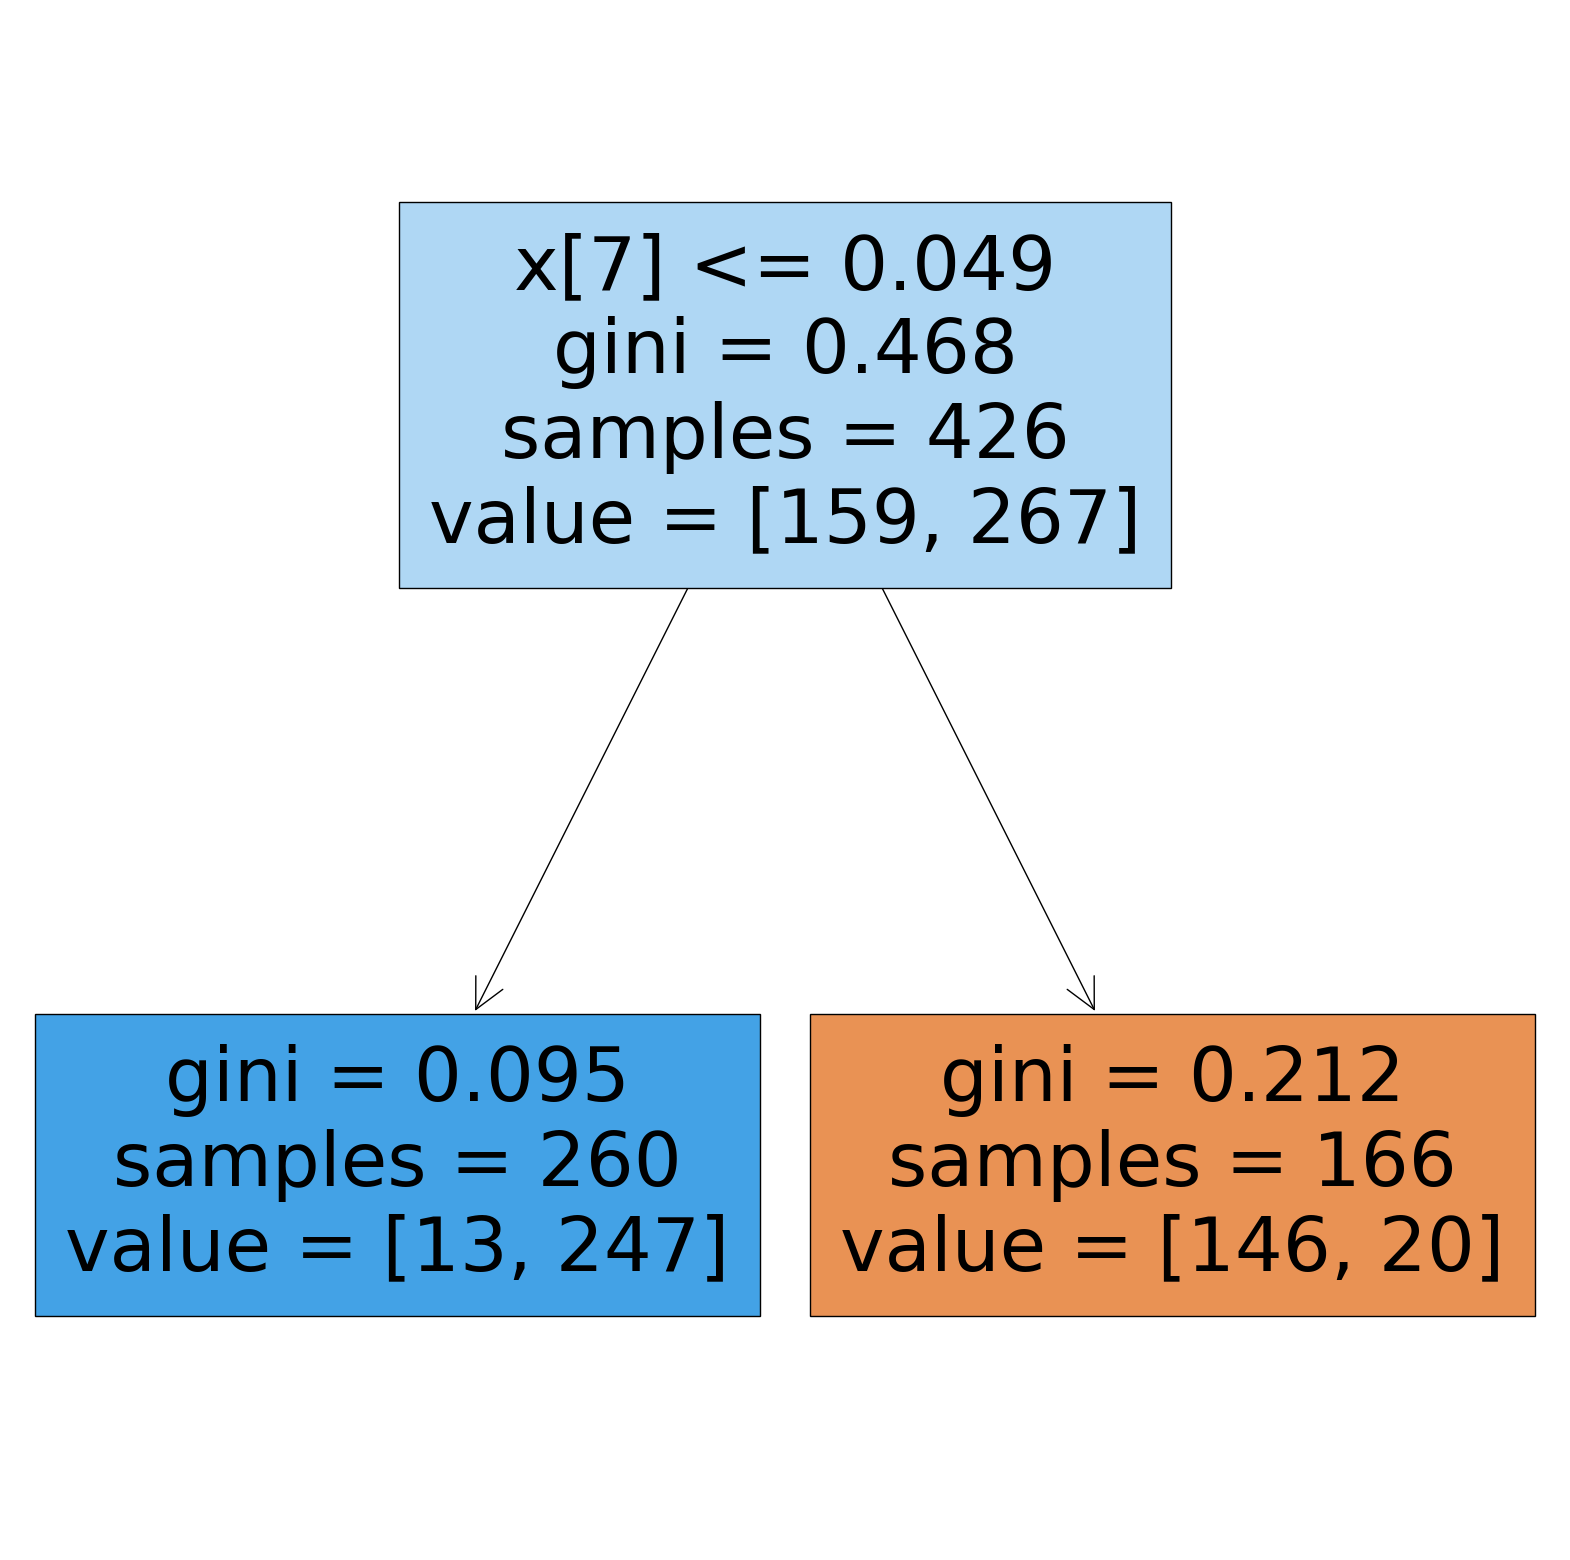

Accuracy Score on train data:  0.9225352112676056
Accuracy Score on the test data:  0.8811188811188811


In [31]:
# Answer to Excercises 3
clf4 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.1).fit(X_train, y_train)
plt.figure(figsize=(20,20))
plot_tree(clf4, filled=True)
plt.show()
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf4.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=clf4.predict(X_test)))

<h3>Answer to Excercis 3 </h3>
    <p>Use this space to provide your explanation for Excercise 3
</p>
    

#### As ccp_alpha increases from 0.01 to 0.1, both training and testing accuracies decrease. This is because a higher ccp_alpha value leads to more pruning of the decision tree, increasing the alpha simplifies the model. While it can help in reducing overfitting (where the model is too complex and fits the noise in the training data), on the other hand too much pruning can result in underfitting, where the model is too simple and cannot capture the underlying patterns in the data.

#### In this case, increasing ccp_alpha to 0.1 might have crossed into underfitting, as evidenced by the reduced accuracies on both the training and testing datasets. The model with ccp_alpha=0.01 strikes a better balance between fitting the training data and generalizing to unseen data, leading to higher accuracies on both datasets

<h2> <font color="blue"> Choosing a value for `alpha` in cost complexity pruning</font> </h2>

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. 

As mentioned above, the cost complexity pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha`` and in general greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on a validation scores. 

See <a href="https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning">`minimal_cost_complexity_pruning`</a> for more details.


<h3> <font color="blue"> Total impurity of leaves vs effective alphas of pruned tree </font> </h3>

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
:func:`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.



In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node. For the remainder of this example, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node.





In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

For the remainder of this example, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.



<h3> <font color="blue"> Accuracy vs alpha for training and testing sets</font> </h3>

When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 88% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.
In this example, setting ``ccp_alpha=0.015`` maximizes the testing accuracy.



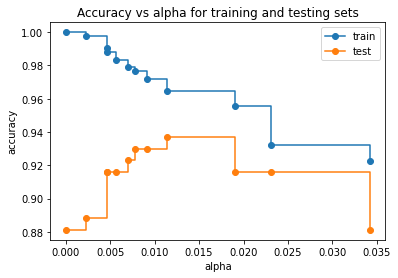

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

<h3><font color="red">Excercises 4 </h3>
    
In the last experiment above, the test dataset has been used as a 'validation' set to tune a parameter of the learning algorithm, i.e. an optimal value for ``ccp_alpha``. However, a testing dataset should be regarded as a hold-out 'unseen' data by the learner and should not be used to tune the learning parameters. In general a subset of the main training dataset should be used as 'validation' set for tuning learning parameters. 
    Repeat the experiment above by splitting the main traning dataset into a new training dataset and a validation set (e.g. 25% of the main training dataset), choose an optimal value for ``ccp_alpha`` using the new training data and the validation set and measure the accuracy of the learned tree on the (hold-out) testing data before and after pruning.
        
You can use the code cell below for this purpose or you could submit the answer.
    
<h3>Hint: You have to follow the following steps</h3>
    <ol>
  <li> Split your dataset into three sets: training, validation, and test sets. </li>
  <li> Fit the decision tree to the training set and generate the cost complexity pruning path. </li>
  <li> Iterate over the ccp_alpha values from the pruning path and for each value, fit the decision tree to the training data and evaluate it on the validation set. </li>
  <li> Record and plot the accuracy of the tree on the training and validation set for each ccp_alpha.</li>
  <li> Select the ccp_alpha value that gives the best accuracy on the validation set. </li>
  <li> Use this ccp_alpha to prune the decision tree and then evaluate the pruned tree on the test set for the final performance assessment. </li>
</ol>

In [33]:
# Answer to Excercises 4



# Split the dataset into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Fit the decision tree to the training set and generate the cost complexity pruning path
tree = DecisionTreeClassifier(random_state=0)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Initialize lists to store the accuracies for each ccp_alpha for training and validation sets
train_accuracies = []
val_accuracies = []

# Iterate over the ccp_alpha values from the pruning path
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    val_accuracies.append(clf.score(X_val, y_val))



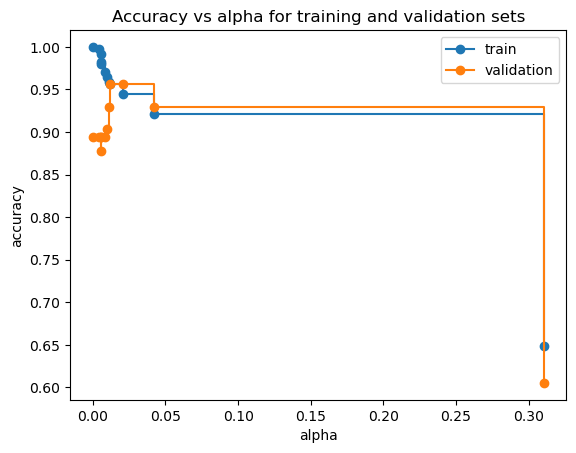

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_accuracies, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_accuracies, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
# Select the ccp_alpha value that gives the best accuracy on the validation set
best_ccp_alpha = ccp_alphas[val_accuracies.index(max(val_accuracies))]

In [37]:
best_ccp_alpha

0.012094248832265099

In [38]:
# Fit the decision tree to the training set using the best ccp_alpha
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012094248832265099, random_state=0)

In [40]:
# Evaluate the pruned tree on the hold-out test set
y_test_pred = clf_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [41]:
test_accuracy

0.9649122807017544

In [42]:
y_test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

<h3><font color="red">Save your notebook after completing the excercises and submit it to SurreyLearn (Assessments -> Assignments -> Lab Exercises - Week 2) as a python notebook file in ipynb formt. </h3>
<h3><font color="red">Deadline: 4:00pm Thur 22 Feb  </h3> 